# Red Wine Analysis with Linear Regression

# Module Imports

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import sklearn library 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import linear model
import statsmodels.regression.linear_model as sm

# Import Redwine Dataset

In [2]:
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/" 
dataset = "winequality-red.csv"
response = requests.get(url+dataset,allow_redirects=True)
with open(dataset,'wb') as dataset_writer:
    dataset_writer.write(response.content)
raw_dataset = pd.read_csv(dataset,sep=";")

In [3]:
# print dataset info 
raw_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

__1. Determine shape of data__

In [4]:
raw_dataset.shape

(1599, 12)

__2. Determine type of data__

In [5]:
# print dataset info 
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


__3. Compute some basic statistical details i.e. min, max, percentile, mean & standard deviation of dataset__

In [6]:
raw_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


__4. Remove space from column names__

In [7]:
raw_dataset.columns = raw_dataset.columns.str.replace(' ','')

__5. Fill null data with mean__

In [8]:
raw_dataset.fillna(raw_dataset.mean())

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


__6. Remove duplicates__

In [9]:
raw_dataset = raw_dataset.drop_duplicates(keep='first')
raw_dataset

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


__7. Plot correlation plot using heat map on Initial Data__

<AxesSubplot:>

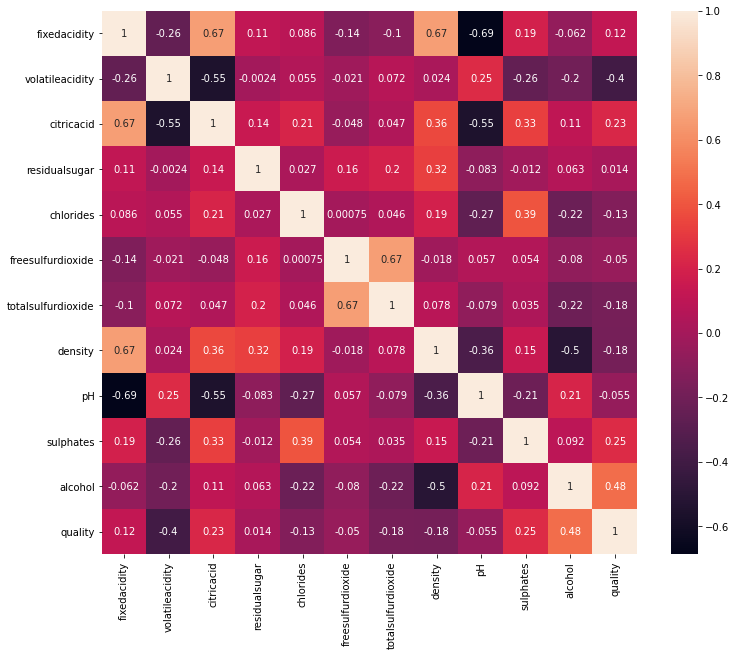

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(raw_dataset.corr(),annot=True,fmt='.2g')

__8. Remove highly correlated columns__

In [11]:
def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corrX_new(df, cut) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)


drop = corrX_new(raw_dataset, cut = 0.70)

for x in drop:
    raw_dataset.drop([x], axis=1, inplace=True)

__9. now plot correlation plot using heat map after removing highly correlated columns__

<AxesSubplot:>

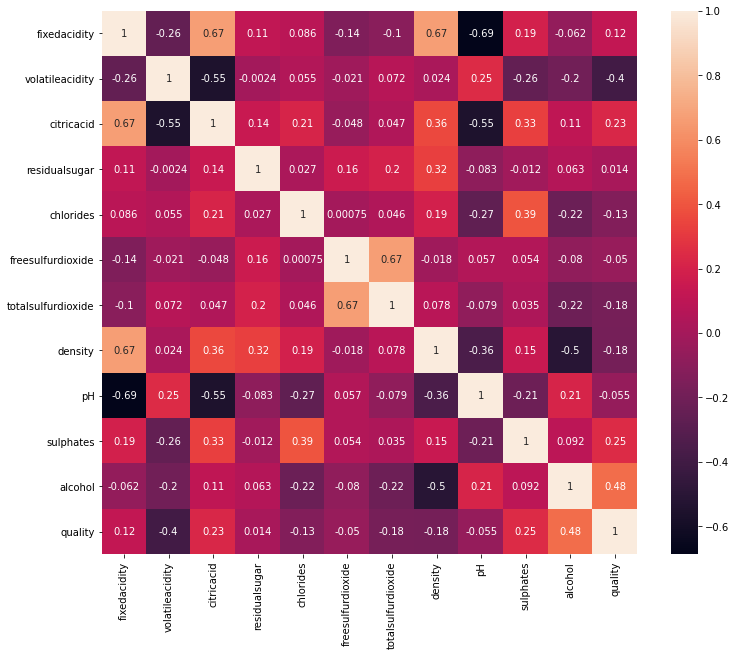

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(raw_dataset.corr(),annot=True,fmt='.2g')

# Training and Testing Data

__1. Define independent and dependent variable__

In [13]:
# print dataset info 
raw_dataset.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
X = raw_dataset[['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol']]
y = raw_dataset['quality']

__2. Applying backward elimination__

In [15]:
X_opt = np.array(X.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]], dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [16]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              9054.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:44:49   Log-Likelihood:                         -1356.9
No. Observations:                1359   AIC:                                      2736.
Df Residuals:                    1348   BIC:                                      2793.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.367e-05      0.018     -0.003      0.997      -0.036       0.036
x2            -1.1286      0.130     -8.712      0.000      -1.383      -0.874
x3            -0.1632      0.162     -1.009      0.313      -0.480       0.154
x4             0.0016      0.014      0.116      0.908      -0.026       0.029
x5            -1.9548      0.446     -4.380      0.000      -2.830      -1.079
x6             0.0034      0.002      1.444      0.149      -0.001       0.008
x7            -0.0027      0.001     -3.441      0.001      -0.004      -0.001
x8             4.5119      0.695      6.491      0.000       3.148       5.876
x9            -0.5235      0.179     -2.929      0.003      -0.874      -0.173
x10            0.8973      0.123      7.286      0.000       0.656       1.139
x11            0.3021      0.019     15.967      0.000       0.265       0.339
==============================================================================
Omnibus:                       24.934   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.336
Skew:                          -0.197   Prob(JB):                     2.12e-08
Kurtosis:                       3.685   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# now looking at the P-value column(P>|t|) we have to eliminate the columns whose P-value SL(0.05)
# we have to remove x1,x3,x4,x6 column
X_opt = np.array(X.iloc[:, [1,4,6,7,8,9,10]], dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.423e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:44:49   Log-Likelihood:                         -1359.0
No. Observations:                1359   AIC:                                      2732.
Df Residuals:                    1352   BIC:                                      2768.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0749      0.108     -9.914      0.000      -1.288      -0.862
x2            -2.0274      0.423     -4.792      0.000      -2.857      -1.197
x3            -0.0020      0.001     -3.714      0.000      -0.003      -0.001
x4             4.1146      0.434      9.488      0.000       3.264       4.965
x5            -0.4033      0.127     -3.167      0.002      -0.653      -0.153
x6             0.8923      0.122      7.312      0.000       0.653       1.132
x7             0.2984      0.018     16.319      0.000       0.263       0.334
==============================================================================
Omnibus:                       25.970   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.419
Skew:                          -0.208   Prob(JB):                     1.24e-08
Kurtosis:                       3.685   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__3. Split the data into a training set and testing set__

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.20, random_state=0)

__4. Feature scaling to get optimized result__

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Training the model

__Use sklearn library to train on train dataset on linear regression and predict on test dataset__

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.intercept_

5.618215271389137

In [23]:
lm.coef_

array([-0.17051147, -0.09836382, -0.08091355, -0.00277187, -0.07337478,
        0.15543816,  0.3462399 ])

# Predicting test data

__Visualize the training and testing results using scatter plots__

__1. Training data visualization__

In [24]:
predictions_train = lm.predict(X_train)

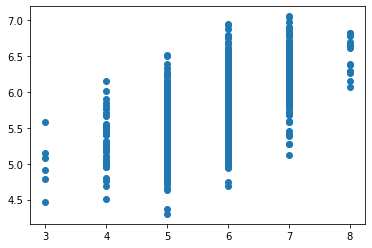

In [25]:
plt.scatter(y_train,predictions_train)

__2. Testing data visualization__

In [26]:
predictions = lm.predict(X_test)

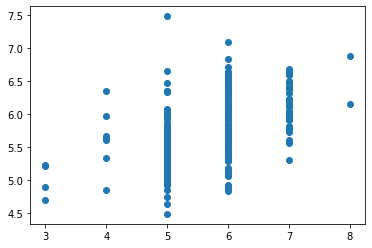

In [27]:
plt.scatter(y_test,predictions)

# Evaluating the model

__Compute the mean squared error, mean absolute error and r2 score__

In [28]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error ',metrics.mean_squared_error(y_test,predictions))
print('r2 score',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error 0.5562177290590273
Mean Squared Error  0.520426679923555
r2 score 0.7214060437254147


In [29]:
metrics.explained_variance_score(y_test,predictions)

0.24969539021530363

# Risidual

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

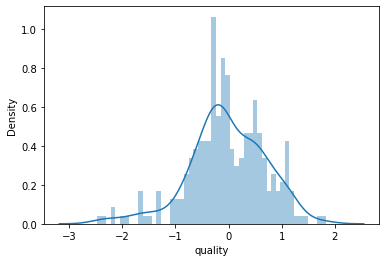

In [30]:
sns.distplot((y_test-predictions),bins=50)

# Conclusion

In [31]:
cdf  = pd.DataFrame(lm.coef_,pd.DataFrame(X_train).columns,columns=['Coeff'])
cdf

,Coeff
0,-0.170511
1,-0.098364
2,-0.080914
3,-0.002772
4,-0.073375
5,0.155438
6,0.346240
